# Breast Cancer Dataset

### by Alex Joseph

## Attributes
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension
- outcome

### Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
#Loading the data

data = pd.read_csv("breast_cancer.csv")

In [3]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
# Shape of the dataset

data.shape

(569, 31)

In [5]:
# Exploring the feature types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Checking for null values

data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
outcome                    0
dtype: int64

### Feature Analysis, Selection and Engineering 

In [ ]:
#Checking the correlation 

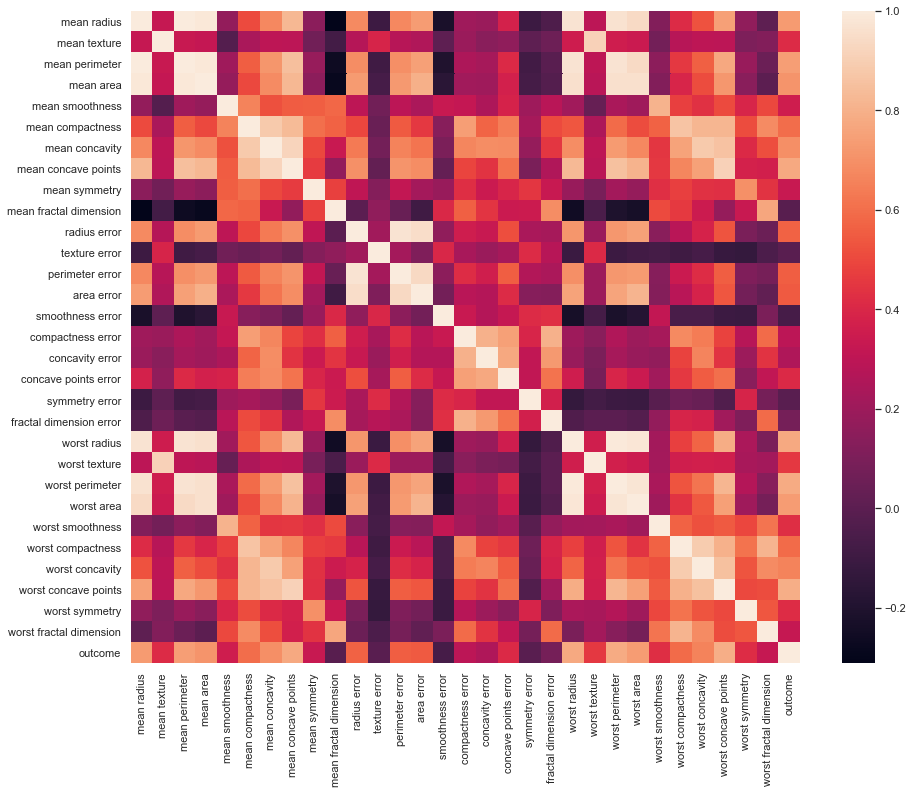

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr());

In [ ]:
# There are lots of highly correlated features

#### Removing highly correlated features

In [8]:
cor_matrix = (data.iloc[:, :-1]).corr().abs()

#Taking the absolute value as the values could be highly negatively correlated as well.

In [47]:
# Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1.
# So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix
# but we should not include the diagonal elements.

In [9]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))

In [10]:
# Getting the columns to drop

to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > 0.9)]

In [11]:
# Dropping columns

df = data.drop(to_drop, axis=1)

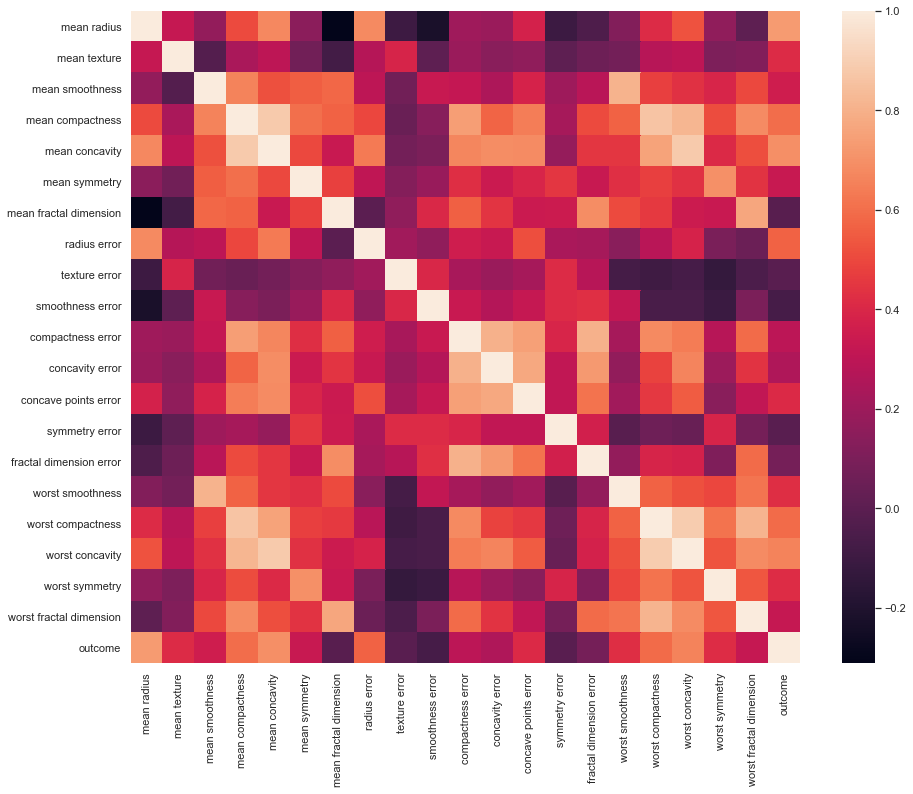

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr());

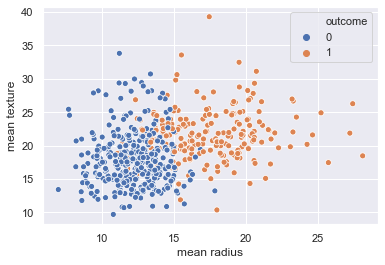

In [13]:
sns.scatterplot('mean radius', 'mean texture', data=df, hue='outcome');

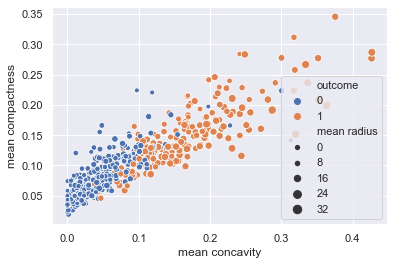

In [14]:
sns.scatterplot('mean concavity', 'mean compactness', size='mean radius', data=df, hue='outcome');

In [15]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890,1
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902,1
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758,1
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300,1
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678,1


In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## Balancing the dataset

In [17]:
Counter(data.outcome)

Counter({1: 212, 0: 357})

The 1s are slightly outnumbered than the 0s. To make the dataset balanced, we shall apply smote

In [18]:
smote = SMOTE(random_state = 10)
X_s, y_s = smote.fit_resample(X, y)

In [48]:
# The dataset is properly 

Counter(y_s)

Counter({1: 357, 0: 357})

## Modelling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=40)

### Support Vector Machine

In [23]:
from sklearn.svm import SVC

svc = SVC(C=100,
          gamma=0.04)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
accuracy_score(y_test, y_predict)

0.9790209790209791

In [24]:
pd.crosstab(y_test, y_predict)

col_0,0,1
outcome,,
0,80,3
1,0,60


In [ ]:
print(classification_report(y_test, y_predict))

### Random Forest Classifier

In [38]:
rfc = RandomForestClassifier(n_estimators=100, 
                             random_state=50, max_depth=6)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
accuracy_score(y_test, y_predict)

0.993006993006993

In [39]:
pd.crosstab(y_test, y_predict)

col_0,0,1
outcome,,
0,82,1
1,0,60


In [ ]:
print(classification_report(y_test, y_predict))

In [45]:
pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['Value']).sort_values(by='Value',ascending=False)

,Value
mean radius,0.198617
mean concavity,0.187795
worst concavity,0.147209
radius error,0.103644
concavity error,0.060034
mean compactness,0.047370
mean texture,0.039219
concave points error,0.030800
worst compactness,0.029040
worst smoothness,0.022978


It appears that 'symmetry error', 'worst fractal dimension', 'texture error' and 'mean symmetry' does not contribute much to the model.

In [49]:
                   ################ END OF PROJECT #######################